In [2]:
# import numpy library

import numpy as np

In [216]:
# the part where we define the function

def generate_sinWave_with_phase_variation(period, Fs, nSamples,noisePerFs,startValue):
    process = np.empty([nSamples,1]);
    noiseVals = np.random.randn(nSamples, 1);
    process[0] = startValue;
    stepSize = period/Fs*2*np.pi; #amount to add on each step

    for i in range(1, nSamples):
        process[i] = process[i-1] + stepSize + noiseVals[i]*noisePerFs;

    sinWave = np.sin(process);
    return np.transpose(sinWave) # need to explicitly return; transpose so that it's one vector with 1000 values
                                 # otherwise python doesn't like it when we try to assign it to sinWaves[:,i] later


In [249]:
# define some variables we need
HzVec = [1, 2, 3, 5, 10]; # frequencies of different sin waves to be generated 
Fs = 100; #sampling frequency of clockface
nSamples = 1000; #total number of samples to generate
period = 1;

timeAxis = np.array(range(1,nSamples))/Fs;
noisePerStep = 0.05; #sigma of noise process to be added at each timestep

sinWaves = np.zeros((nSamples, len(HzVec))) # need to initiate a matrix of zeros
                                            # here it's 1000*5

In [250]:
# now add values to the sinWaves function, column by column

for i in range(0,len(HzVec)):
    startValue = np.random.uniform(0,1)*2*np.pi;
    #print(generate_sinWave_with_phase_variation(HzVec[i],Fs,nSamples,noisePerStep,startValue))
    sinWaves[:,i] = generate_sinWave_with_phase_variation(HzVec[i],Fs,nSamples,noisePerStep,startValue)
    sinWaves = sinWaves * 5*np.sqrt(2); #standard deviation of a sin wave is sqrt(2)/2 - we rescale so that std is now 5

# check the dimensions of sinWaves
print(sinWaves.shape)


(1000, 5)


In [219]:
# import library we need for plotting

import matplotlib.pyplot as plt

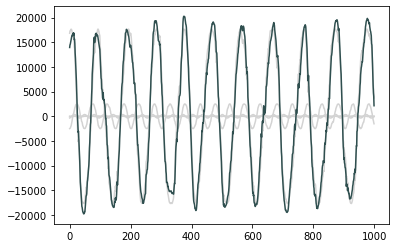

In [247]:
# create an array that sums across each row of sinWaves
# i.e., adding signals from all the constitutent sine waves together
timeCourseOverall = sinWaves.sum(axis=1) 

# now plot!
plt.plot(sinWaves, color = 'lightgrey')
plt.plot(timeCourseOverall, color = 'darkslategrey')